In [3]:
import uproot
import pandas
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

In [26]:
file_pT_5  = '/eos/user/m/mkovac/Data/DY_2016_1_6_2019/pt_eta_score_pT_5.h5'
file_pT_10 = '/eos/user/m/mkovac/Data/DY_2016_1_6_2019/pt_eta_score_pT_10.h5'

df_pT_5  = pandas.read_hdf(file_pT_5)
df_pT_10 = pandas.read_hdf(file_pT_10)

In [36]:
df_pT_5  = df_pT_5.query("y > -1 & mu_dxy < 0.5 & mu_dz < 1")
df_pT_10 = df_pT_10.query("y > -1 & mu_dxy < 0.5 & mu_dz < 1")

df_pT_5["Muon_ISO"] = (df_pT_5["mu_pf_charged_had_iso"] + np.clip(df_pT_5["mu_pf_neutral_had_iso"] + df_pT_5["mu_pf_photon_iso"] - 0.5*df_pT_5["mu_pu_charged_had_iso"], 0, None))/df_pT_5["mu_pT"]
df_pT_10["Muon_ISO"] = (df_pT_10["mu_pf_charged_had_iso"] + np.clip(df_pT_10["mu_pf_neutral_had_iso"] + df_pT_10["mu_pf_photon_iso"] - 0.5*df_pT_10["mu_pu_charged_had_iso"], 0, None))/df_pT_10["mu_pT"]

df_pT_10.head(5)


,mu_pT,mu_eta,is_pf_mu,mu_pf_charged_had_iso,mu_pf_neutral_had_iso,mu_pf_photon_iso,mu_pu_charged_had_iso,mu_sip,mu_dxy,mu_dz,genNpu,y,bdt_score_default,bdt_score_optimized,Muon_ISO
33491456,41.990051,-1.291376,True,0.740636,0.000000,0.000000,0.000000,1.070404,0.002338,0.001365,14,1,4.399957,4.399957,0.017638
56321200,22.736526,0.288681,True,0.000000,0.000000,0.000000,6.375971,8.850898,0.002961,0.107222,25,1,3.071238,3.071238,0.000000
3983837,49.407700,-0.238424,True,0.000000,0.000000,0.000000,2.629445,0.091204,0.000087,0.000192,23,1,6.648314,6.648314,0.000000
28442169,76.683884,-1.021134,True,0.000000,0.000000,0.000000,0.000000,0.412665,0.000556,0.001424,20,1,6.273446,6.273446,0.000000
61325666,21.833500,1.102015,True,0.373420,0.901212,0.559286,8.611440,0.797338,0.001491,0.003634,45,1,3.196787,3.196787,0.017103


In [39]:
df_pT_5_sig = df_pT_5.query('y == 1')
df_pT_5_bkg = df_pT_5.query('y == 0')

df_pT_10_sig = df_pT_10.query('y == 1')
df_pT_10_bkg = df_pT_10.query('y == 0')

MVA score plots

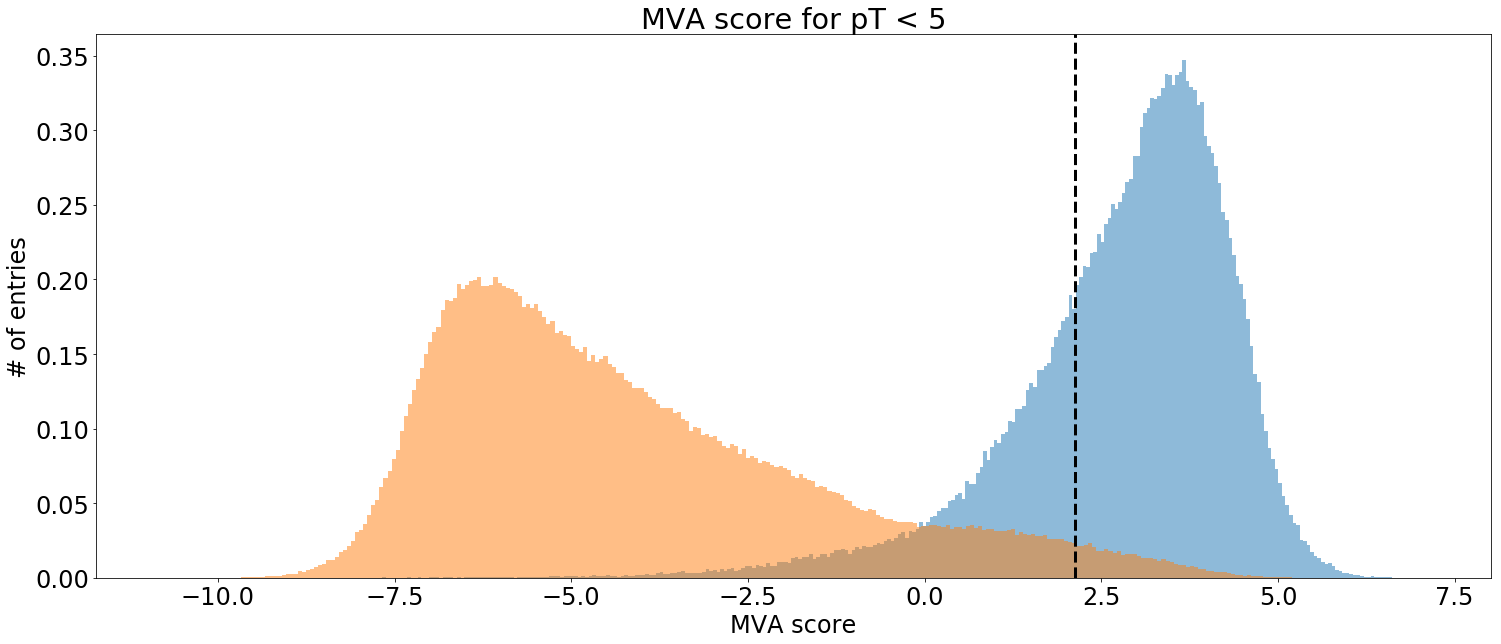

In [50]:
plt.figure(figsize = (25,10))
plt.hist(df_pT_5_sig['bdt_score_default'], bins = 300, histtype = 'bar', alpha = 0.5, linewidth = 2, density=1)
plt.hist(df_pT_5_bkg['bdt_score_default'], bins = 300, histtype = 'bar', alpha = 0.5, linewidth = 2, density=1)
plt.title('MVA score for pT < 5')
plt.ylabel('# of entries')
plt.xlabel('MVA score')

plt.axvline(x = 2.121, ls = 'dashed', color = 'black', lw = 3)

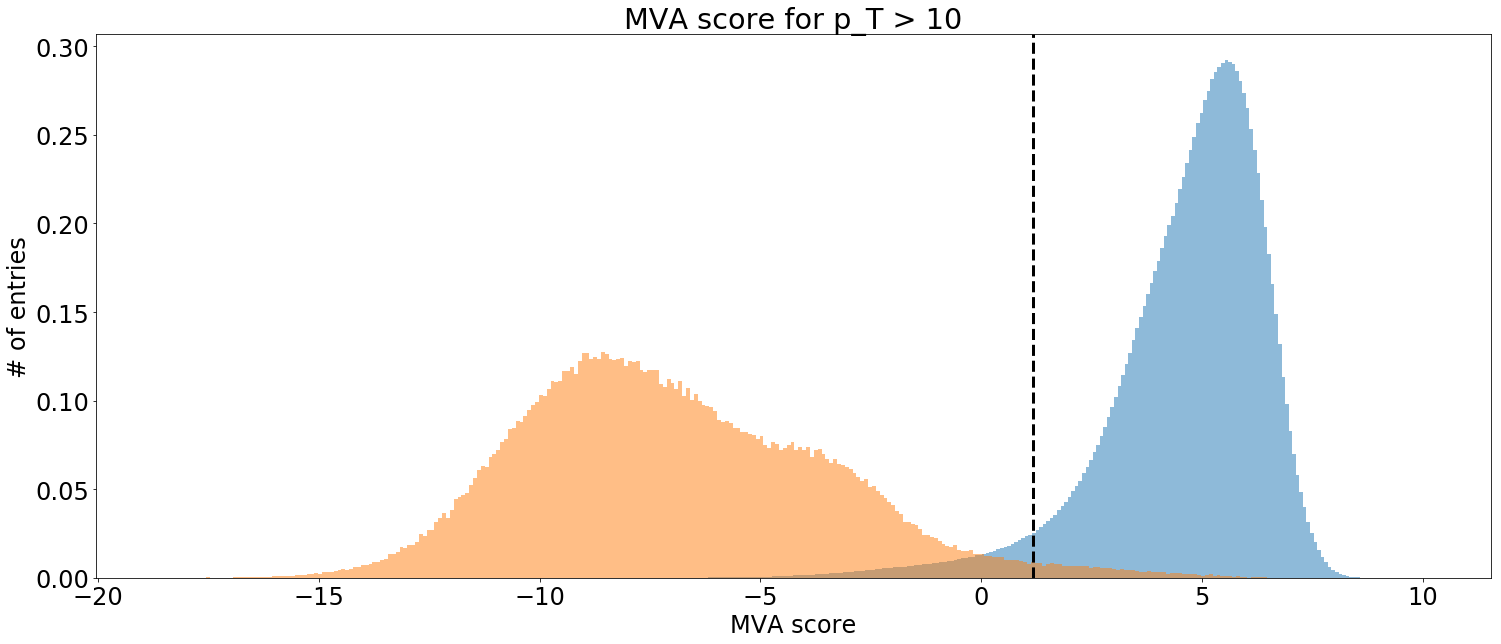

In [49]:
plt.figure(figsize = (25,10))
plt.hist(df_pT_10_sig['bdt_score_default'], bins = 300, histtype = 'bar', alpha = 0.5, linewidth = 2, density = 1)
plt.hist(df_pT_10_bkg['bdt_score_default'], bins = 300, histtype = 'bar', alpha = 0.5, linewidth = 2, density = 1)
plt.title('MVA score for p_T > 10')
plt.ylabel('# of entries')
plt.xlabel('MVA score')

plt.axvline(x = 1.177, ls = 'dashed', color = 'black', lw = 3)